In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Load from OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

print(df.head())
x = df.drop("MEDV", axis=1)
y = df["MEDV"]

# split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

c:\Users\Solution\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [279]:
type(df)

pandas.core.frame.DataFrame

In [280]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [281]:
df.shape

(506, 14)

Description of DataSet

In [282]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

Preparing The Dataset

In [284]:
df.shape

(506, 14)

In [285]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [286]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [11]:
# print(df["Price"].value_counts())

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [288]:
df.describe().sum()

CRIM        611.213226
ZN          653.186089
INDUS       585.177132
NOX         509.537573
RM          544.045752
AGE         922.223763
DIS         535.652903
TAX        3255.774270
PTRATIO     617.870479
B          2514.231396
LSTAT       600.759125
MEDV        655.954910
dtype: float64

In [289]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [290]:
df.duplicated().sum()

0

In [291]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
175,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296.0,16.6,390.96,5.33,29.4
233,0.33147,0.0,6.20,0,0.507,8.247,70.4,3.6519,8,307.0,17.4,378.95,3.95,48.3
126,0.38735,0.0,25.65,0,0.581,5.613,95.6,1.7572,2,188.0,19.1,359.29,27.26,15.7


In [292]:
df["CRIM"].value_counts()

CRIM
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
0.02543     1
0.02498     1
0.01301     1
0.06151     1
0.05497     1
0.03306     1
0.03041     1
0.03427     1
0.03961     1
0.03738     1
0.05083     1
0.05023     1
0.01870     1
0.04544     1
0.06724     1
0.06617     1
0.24103     1
0.30347     1
0.19186     1
0.34109     1
0.28392     1
0.35114     1
0.18159     1
0.16760     1
0.47547     1
0.40202     1
0.06162     1
0.00632     1
0.31827     1
0.02899     1
15.28800    1
19.60910    1
18.49820    1
11.10810    1
8.26725     1
9.23230     1
6.53876     1
5.66998     1
4.89822     1
13.52220    1
3.69695     1
4.55587     1
3.47428     1
4.22239     1
3.67822     1
3.83684     1
4.54192     1
4.26131     1
5.20177     1
3.84970     1
8.98296     1
0.10659     1
0.04301     1
0.01709     1
0.07244     1
0.07950     1
0.06211     1
0.24522     1
0.25356     1
23.64820    1
0.54050     1
0.03705     1
0.03578     1
0.21038     1
0.07978     1
0.06127     1
0

In [293]:
df["CRIM"].to_string()

'0       0.00632\n1       0.02731\n2       0.02729\n3       0.03237\n4       0.06905\n5       0.02985\n6       0.08829\n7       0.14455\n8       0.21124\n9       0.17004\n10      0.22489\n11      0.11747\n12      0.09378\n13      0.62976\n14      0.63796\n15      0.62739\n16      1.05393\n17      0.78420\n18      0.80271\n19      0.72580\n20      1.25179\n21      0.85204\n22      1.23247\n23      0.98843\n24      0.75026\n25      0.84054\n26      0.67191\n27      0.95577\n28      0.77299\n29      1.00245\n30      1.13081\n31      1.35472\n32      1.38799\n33      1.15172\n34      1.61282\n35      0.06417\n36      0.09744\n37      0.08014\n38      0.17505\n39      0.02763\n40      0.03359\n41      0.12744\n42      0.14150\n43      0.15936\n44      0.12269\n45      0.17142\n46      0.18836\n47      0.22927\n48      0.25387\n49      0.21977\n50      0.08873\n51      0.04337\n52      0.05360\n53      0.04981\n54      0.01360\n55      0.01311\n56      0.02055\n57      0.01432\n58      0.154

In [294]:
pd.set_option("display.max_rows", None)  # show all rows
print(df["CRIM"])

0       0.00632
1       0.02731
2       0.02729
3       0.03237
4       0.06905
5       0.02985
6       0.08829
7       0.14455
8       0.21124
9       0.17004
10      0.22489
11      0.11747
12      0.09378
13      0.62976
14      0.63796
15      0.62739
16      1.05393
17      0.78420
18      0.80271
19      0.72580
20      1.25179
21      0.85204
22      1.23247
23      0.98843
24      0.75026
25      0.84054
26      0.67191
27      0.95577
28      0.77299
29      1.00245
30      1.13081
31      1.35472
32      1.38799
33      1.15172
34      1.61282
35      0.06417
36      0.09744
37      0.08014
38      0.17505
39      0.02763
40      0.03359
41      0.12744
42      0.14150
43      0.15936
44      0.12269
45      0.17142
46      0.18836
47      0.22927
48      0.25387
49      0.21977
50      0.08873
51      0.04337
52      0.05360
53      0.04981
54      0.01360
55      0.01311
56      0.02055
57      0.01432
58      0.15445
59      0.10328
60      0.14932
61      0.17171
62      

<Axes: xlabel='CRIM'>

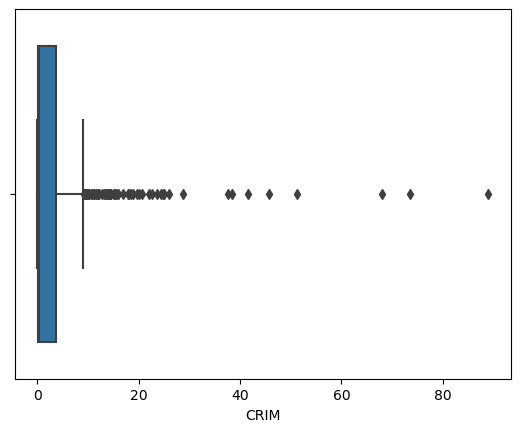

In [295]:
sns.boxplot(x=df["CRIM"])

In [19]:
df=df[df["CRIM"]!=88.97620]

<Axes: xlabel='CRIM'>

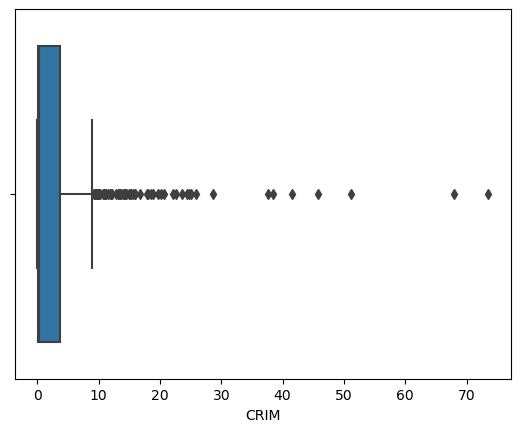

In [20]:
sns.boxplot(x=df["CRIM"])

In [21]:
df["ZN"].value_counts()

ZN
0.0      371
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64

<Axes: >

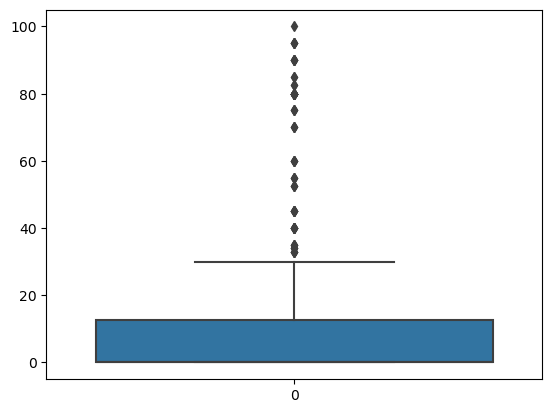

In [297]:
sns.boxplot(df["ZN"])

In [296]:
df["INDUS"].value_counts()

INDUS
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
3.97      12
9.90      12
8.56      11
10.59     11
5.86      10
6.91       9
10.01      9
5.19       8
9.69       8
7.38       8
2.46       8
25.65      7
2.18       7
4.05       7
7.87       7
3.44       6
12.83      6
4.93       6
5.13       6
6.96       5
27.74      5
13.92      5
6.41       5
11.93      5
2.89       5
4.49       4
5.64       4
10.81      4
4.86       4
13.89      4
1.52       4
5.96       4
3.41       4
3.33       4
3.24       3
6.09       3
2.24       3
4.95       3
5.32       3
6.07       3
15.04      3
1.25       2
1.69       2
6.06       2
3.37       2
1.91       2
3.78       2
2.95       2
3.64       2
7.07       2
2.68       2
2.03       2
1.47       2
2.93       2
4.39       2
2.02       1
2.01       1
4.15       1
1.76       1
1.89       1
4.00       1
1.22       1
0.74       1
1.32       1
2.25       1
2.97       1
1.21       1
1.38       1
3.75       1
0.46       1
2.31       1
Name: 

<Axes: >

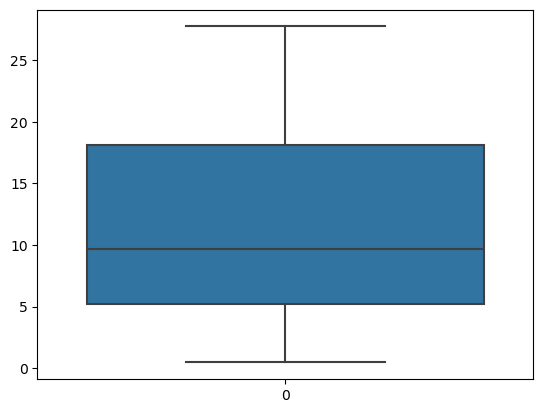

In [24]:
sns.boxplot(df["INDUS"])

In [25]:
df["CHAS"].value_counts()

CHAS
0    470
1     35
Name: count, dtype: int64

<Axes: >

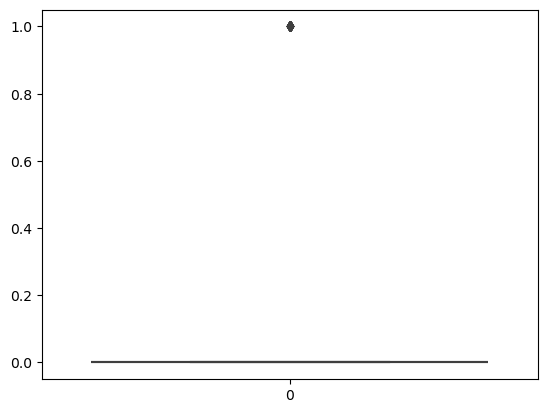

In [26]:
sns.boxplot(df["CHAS"])

<Axes: ylabel='count'>

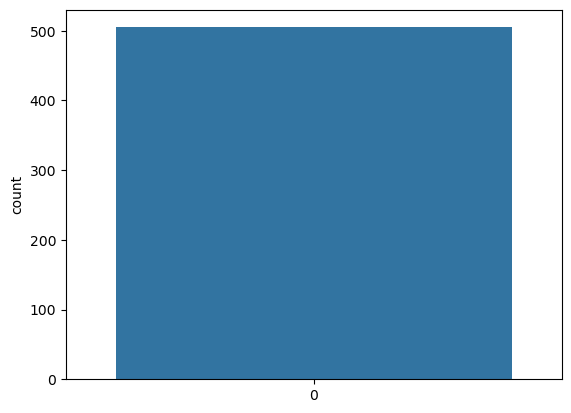

In [27]:
sns.countplot(df["CHAS"])

In [26]:
df["CHAS"].to_string()

"0      0\n1      0\n2      0\n3      0\n4      0\n5      0\n6      0\n7      0\n8      0\n9      0\n10     0\n11     0\n12     0\n13     0\n14     0\n15     0\n16     0\n17     0\n18     0\n19     0\n20     0\n21     0\n22     0\n23     0\n24     0\n25     0\n26     0\n27     0\n28     0\n29     0\n30     0\n31     0\n32     0\n33     0\n34     0\n35     0\n36     0\n37     0\n38     0\n39     0\n40     0\n41     0\n42     0\n43     0\n44     0\n45     0\n46     0\n47     0\n48     0\n49     0\n50     0\n51     0\n52     0\n53     0\n54     0\n55     0\n56     0\n57     0\n58     0\n59     0\n60     0\n61     0\n62     0\n63     0\n64     0\n65     0\n66     0\n67     0\n68     0\n69     0\n70     0\n71     0\n72     0\n73     0\n74     0\n75     0\n76     0\n77     0\n78     0\n79     0\n80     0\n81     0\n82     0\n83     0\n84     0\n85     0\n86     0\n87     0\n88     0\n89     0\n90     0\n91     0\n92     0\n93     0\n94     0\n95     0\n96     0\n97     0\n98     0\n99     0\

In [28]:
df["NOX"].value_counts()

NOX
0.5380    23
0.7130    18
0.4370    17
0.8710    16
0.6240    15
0.4890    15
0.6930    14
0.6050    14
0.7400    13
0.5440    12
0.7000    11
0.5200    11
0.4310    10
0.5070    10
0.6470    10
0.4480     9
0.5470     9
0.4880     8
0.5850     8
0.4930     8
0.5150     8
0.4640     8
0.7700     8
0.5840     8
0.5040     8
0.4280     8
0.6790     8
0.5100     7
0.6140     7
0.5810     7
0.5240     7
0.4110     6
0.5970     6
0.4530     6
0.6710     6
0.7180     6
0.4130     6
0.4470     5
0.6310     5
0.5320     5
0.6090     5
0.5730     5
0.4450     5
0.4390     4
0.4990     4
0.4000     4
0.4260     4
0.4490     4
0.5830     4
0.5800     4
0.4720     4
0.5500     4
0.4429     4
0.6680     3
0.4040     3
0.4100     3
0.4010     3
0.4030     3
0.4161     3
0.6550     3
0.4580     3
0.4330     3
0.4290     3
0.4050     3
0.4090     3
0.4600     3
0.4420     3
0.4379     2
0.3980     2
0.4690     2
0.5750     2
0.3920     2
0.6590     2
0.4840     2
0.4150     2
0.4220     1
0.3940  

<Axes: >

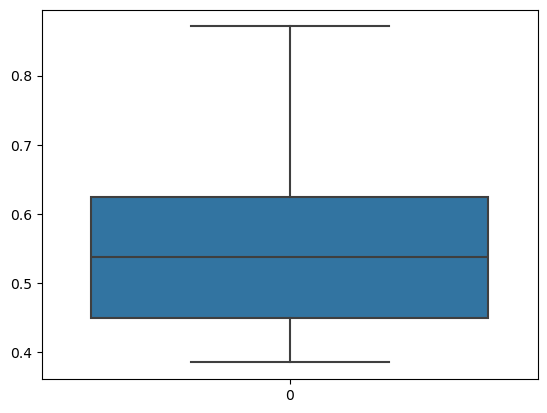

In [29]:
sns.boxplot(df["NOX"])

<Axes: >

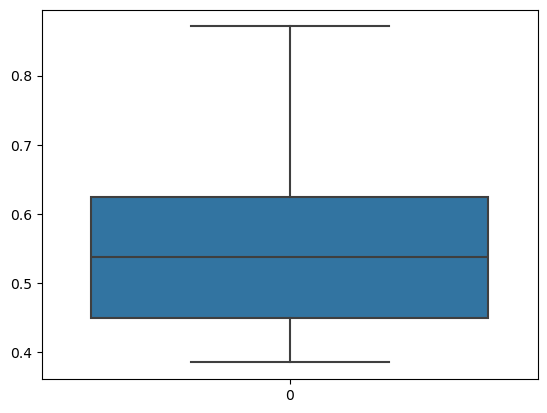

In [30]:
sns.boxplot(df["NOX"])

<Axes: >

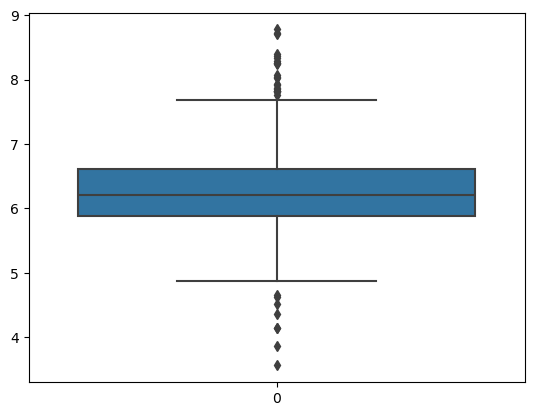

In [31]:
sns.boxplot(df["RM"])

In [32]:
df["RM"].value_counts()

RM
5.713    3
6.167    3
6.127    3
6.229    3
6.405    3
6.417    3
6.782    2
6.951    2
6.630    2
6.312    2
6.380    2
7.820    2
5.304    2
6.727    2
6.376    2
6.162    2
6.635    2
5.888    2
6.185    2
6.144    2
6.315    2
6.980    2
6.211    2
6.122    2
5.404    2
6.152    2
5.936    2
4.138    2
6.728    2
5.757    2
6.794    2
6.326    2
6.431    2
5.854    2
5.856    2
5.390    2
5.875    2
6.193    2
6.030    2
5.961    2
6.251    2
5.966    2
6.209    2
5.813    2
6.495    2
5.926    2
5.935    2
6.108    2
6.096    2
6.009    2
6.004    2
5.983    2
7.185    2
7.327    1
7.203    1
6.112    1
5.968    1
5.985    1
6.059    1
7.470    1
5.895    1
5.920    1
5.869    1
7.241    1
6.240    1
6.037    1
6.538    1
6.310    1
6.398    1
7.691    1
6.395    1
6.212    1
7.206    1
6.939    1
5.560    1
5.884    1
5.663    1
7.014    1
6.579    1
6.490    1
8.398    1
6.516    1
7.520    1
8.297    1
5.898    1
6.316    1
6.014    1
6.874    1
6.696    1
6.540    1
6.758  

In [33]:
df["AGE"].value_counts()

AGE
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
98.8      4
87.9      4
95.6      3
97.0      3
21.4      3
36.6      3
98.9      3
32.2      3
97.3      3
97.4      3
92.6      3
96.2      3
94.1      3
88.0      3
76.5      3
41.1      2
90.0      2
88.4      2
84.1      2
82.6      2
34.5      2
18.5      2
92.9      2
91.2      2
96.7      2
85.4      2
86.5      2
59.7      2
79.9      2
28.9      2
53.6      2
91.0      2
54.3      2
94.5      2
70.4      2
93.3      2
61.5      2
83.0      2
82.5      2
27.7      2
76.7      2
88.5      2
32.0      2
94.6      2
79.2      2
18.4      2
91.8      2
93.9      2
90.8      2
31.9      2
94.7      2
52.3      2
17.5      2
85.1      2
93.8      2
93.6      2
92.4      2
98.4      2
77.7      2
80.8      2
7.8       2
65.2      2
87.3      2
45.8      2
95.3      2
21.9      2
96.6      2
6.6       2
47.2      2
82.9      2
94.3      2
58.7      2
98.1      2
96.1      2
98.3      2
70.6      2
31.1      2
95.0      2


<Axes: >

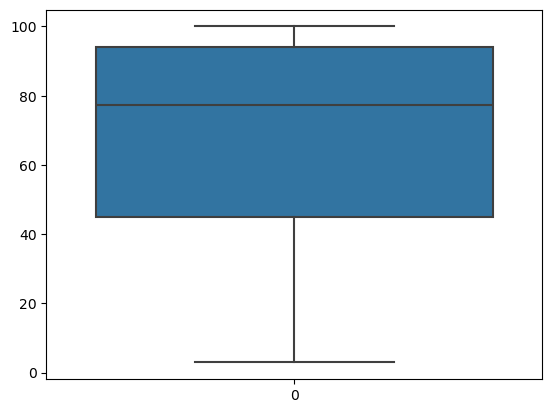

In [34]:
sns.boxplot(df["AGE"])

In [35]:
df["DIS"].value_counts()

DIS
3.4952     5
5.7209     4
6.8147     4
5.2873     4
5.4007     4
4.8122     3
3.9454     3
6.4980     3
3.6519     3
7.3172     3
5.1167     3
4.7211     3
7.3090     3
5.4159     3
7.8278     3
5.4917     3
6.4798     3
6.0622     3
6.3361     3
4.1480     2
8.9067     2
6.1899     2
4.5026     2
7.0355     2
3.6715     2
6.6115     2
7.9549     2
8.0555     2
3.3175     2
3.2721     2
3.3751     2
3.2157     2
6.2196     2
7.6534     2
6.2700     2
5.1180     2
4.3549     2
1.9512     2
10.5857    2
10.7103    2
8.7921     2
2.7147     2
2.7778     2
3.6659     2
8.0136     2
7.3967     2
2.8944     2
7.8265     2
4.5667     2
1.9047     2
4.9671     2
9.2203     2
3.7965     2
2.3817     2
2.4259     2
4.4986     2
4.5404     2
4.4290     2
3.9175     2
7.3073     2
2.7986     2
5.2146     2
6.6407     2
5.4011     2
5.1004     2
6.4584     2
1.3861     2
5.5027     2
5.9604     2
1.6132     1
1.9265     1
2.1678     1
1.7281     1
1.7523     1
1.5106     1
1.3325     1
1.3567  

<Axes: >

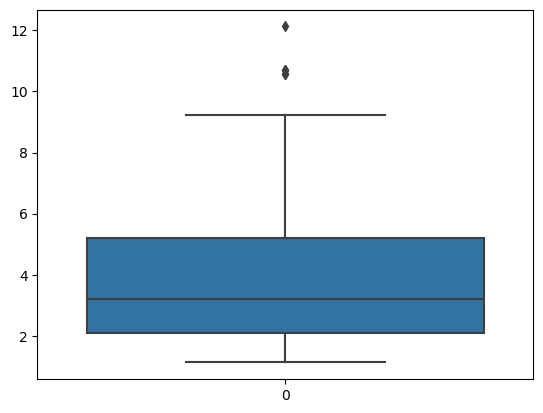

In [36]:
sns.boxplot(df["DIS"])

In [37]:
df=df[df["DIS"]!=12.1265]
df=df[df["DIS"]!=10.5857]
df=df[df["DIS"]!=10.7103]

<Axes: >

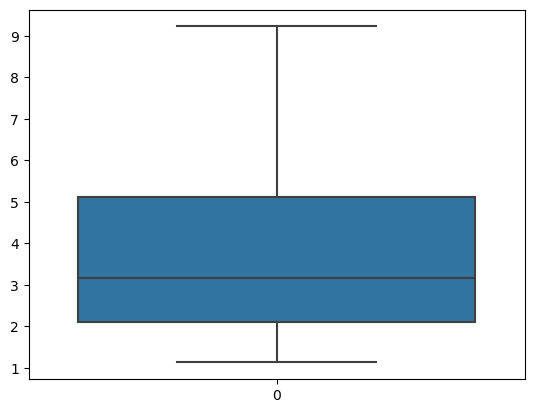

In [38]:
sns.boxplot(df["DIS"])

In [39]:
df["RAD"].value_counts()

RAD
24    131
5     114
4     106
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

<Axes: >

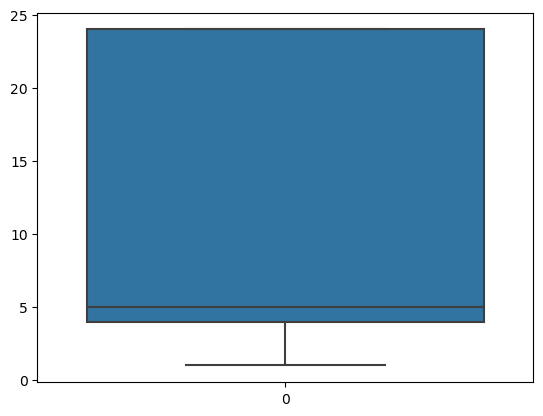

In [40]:
sns.boxplot(df["RAD"])

In [41]:
df["TAX"].value_counts()

TAX
666.0    131
307.0     40
403.0     30
437.0     15
304.0     14
398.0     12
264.0     12
384.0     11
277.0     11
224.0     10
330.0     10
276.0      9
233.0      9
432.0      9
193.0      8
296.0      8
287.0      8
391.0      8
284.0      7
311.0      7
188.0      7
270.0      7
222.0      7
300.0      7
329.0      6
273.0      5
216.0      5
711.0      5
289.0      5
254.0      5
223.0      5
279.0      4
243.0      4
281.0      4
247.0      4
305.0      4
358.0      3
293.0      3
345.0      3
430.0      3
245.0      3
252.0      2
335.0      2
352.0      2
370.0      2
265.0      2
337.0      2
242.0      2
402.0      2
348.0      2
315.0      2
241.0      1
255.0      1
256.0      1
469.0      1
198.0      1
422.0      1
351.0      1
280.0      1
226.0      1
244.0      1
313.0      1
285.0      1
Name: count, dtype: int64

<Axes: >

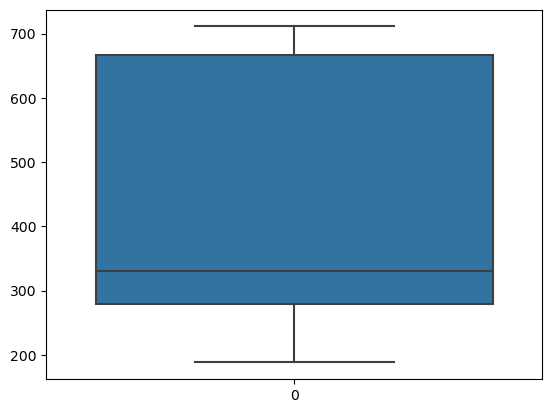

In [42]:
sns.boxplot(df["TAX"])

In [43]:
df["PTRATIO"].value_counts()

PTRATIO
20.2    139
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
19.1     17
18.6     17
18.4     16
16.6     16
21.2     15
15.2     13
13.0     12
17.9     11
20.9     11
18.7      9
19.6      8
19.7      8
17.6      7
16.4      6
16.9      5
16.0      5
20.1      5
18.0      5
16.1      5
18.5      4
16.8      4
18.2      4
19.0      4
14.9      4
17.0      3
18.9      3
12.6      3
14.8      3
15.3      3
15.9      2
15.6      2
18.3      2
18.8      2
14.4      1
13.6      1
15.1      1
17.3      1
21.1      1
15.5      1
Name: count, dtype: int64

<Axes: >

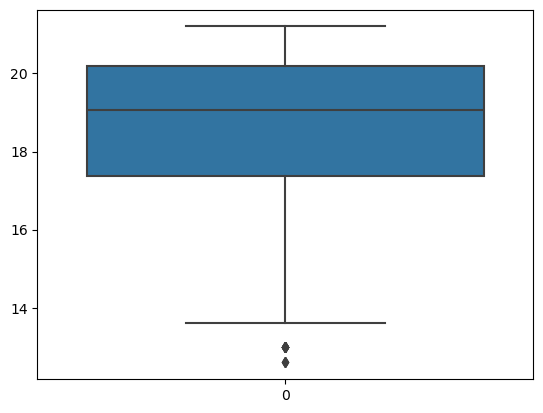

In [44]:
sns.boxplot(df["PTRATIO"])

In [45]:
df=df[df["PTRATIO"]!=12.6]

<Axes: >

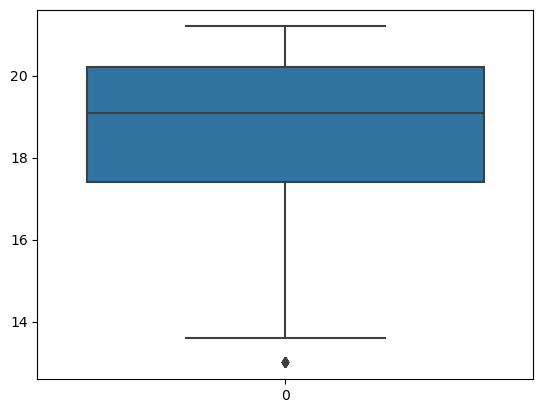

In [46]:
sns.boxplot(df["PTRATIO"])

In [47]:
df["B"].value_counts()

B
396.90    119
395.24      3
393.74      3
341.60      2
388.45      2
392.80      2
395.63      2
394.72      2
395.11      2
393.45      2
395.58      2
393.68      2
396.21      2
376.14      2
392.78      2
390.94      2
391.34      2
389.71      2
395.62      2
377.07      2
394.12      2
395.60      2
396.06      2
374.71      2
395.56      2
395.69      2
393.37      2
393.23      2
396.14      1
394.81      1
394.74      1
389.96      1
368.57      1
375.21      1
387.97      1
394.02      1
362.25      1
389.40      1
364.61      1
385.64      1
354.55      1
347.88      1
366.15      1
392.05      1
375.33      1
375.52      1
131.42      1
316.03      1
354.70      1
353.04      1
391.13      1
380.79      1
350.65      1
374.56      1
390.74      1
395.43      1
377.73      1
389.85      1
392.43      1
382.44      1
396.24      1
396.23      1
387.31      1
390.77      1
394.96      1
388.65      1
390.30      1
384.54      1
384.07      1
392.40      1
387.89      1
393.

<Axes: >

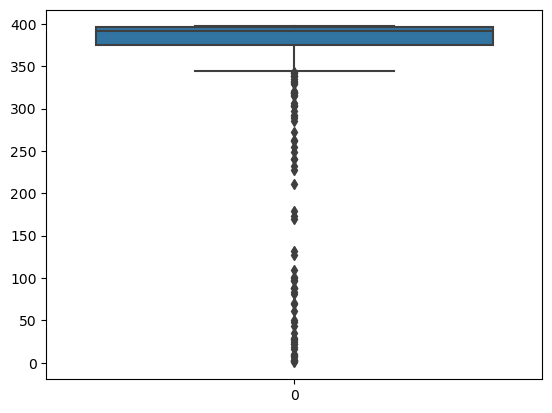

In [48]:
sns.boxplot(df["B"])

In [49]:
df["LSTAT"].value_counts()

LSTAT
14.10    3
6.36     3
18.13    3
13.44    2
12.67    2
3.76     2
17.60    2
13.00    2
8.05     2
15.02    2
7.60     2
9.50     2
4.59     2
7.39     2
14.81    2
5.29     2
12.03    2
3.11     2
7.44     2
13.15    2
3.95     2
30.81    2
23.98    2
17.27    2
9.97     2
5.98     2
18.06    2
10.45    2
12.43    2
3.53     2
18.46    2
4.45     2
3.16     2
13.27    2
5.33     2
4.56     2
21.32    2
6.58     2
7.79     2
10.11    2
6.72     2
15.17    2
5.50     2
5.68     2
8.10     2
6.15     1
10.56    1
12.79    1
9.80     1
8.01     1
7.34     1
9.09     1
7.83     1
6.75     1
4.98     1
8.51     1
14.64    1
37.97    1
34.77    1
8.88     1
9.53     1
2.96     1
3.73     1
3.26     1
13.33    1
14.00    1
7.12     1
10.19    1
9.74     1
14.19    1
11.48    1
5.89     1
5.99     1
10.53    1
4.61     1
7.18     1
8.65     1
5.49     1
9.29     1
5.08     1
18.33    1
6.12     1
7.19     1
4.70     1
3.56     1
3.33     1
9.51     1
7.14     1
12.93    1
8.23     1
7.85

<Axes: >

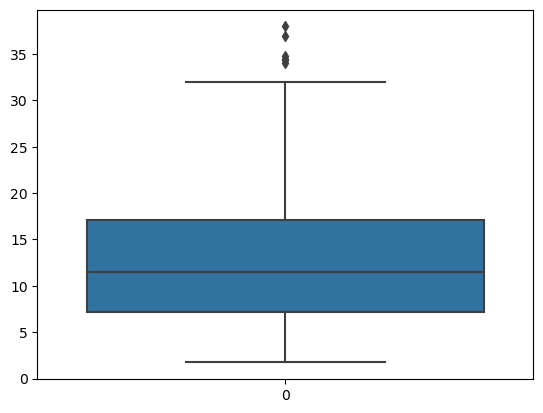

In [50]:
sns.boxplot(df["LSTAT"])

In [51]:
df["MEDV"].value_counts()

MEDV
50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
19.4     6
21.2     5
19.3     5
15.6     5
22.2     5
19.6     5
17.8     5
20.0     5
21.4     5
20.1     5
13.8     5
20.6     5
23.9     5
22.6     5
27.5     4
23.7     4
23.2     4
23.3     4
22.8     4
24.8     4
18.5     4
19.5     4
20.3     4
13.1     4
19.1     4
24.4     4
23.0     4
22.9     4
19.9     4
13.4     4
18.9     4
23.8     4
20.4     4
20.8     3
17.4     3
19.8     3
21.9     3
24.5     3
7.2      3
15.0     3
24.3     3
22.5     3
28.7     3
14.1     3
14.9     3
17.5     3
13.3     3
15.2     3
20.5     3
24.7     3
34.9     3
26.6     3
12.7     3
21.0     3
18.4     3
10.2     3
17.1     3
17.2     3
16.1     3
14.5     3
18.7     3
22.7     2
32.0     2
21.6     2
26.4     2
22.3     2
29.8     2
29.6     2
29.1     2
24.0     2
22.4     2
30.1     2
21.8     2
11.7     2
16.7     2
8.4      2
7.0      2
11.9     2
8.3      2
5.0      2
8.5      2
10.5     2
8.8      2
10.9     2
16.8     2
19.0 

<Axes: >

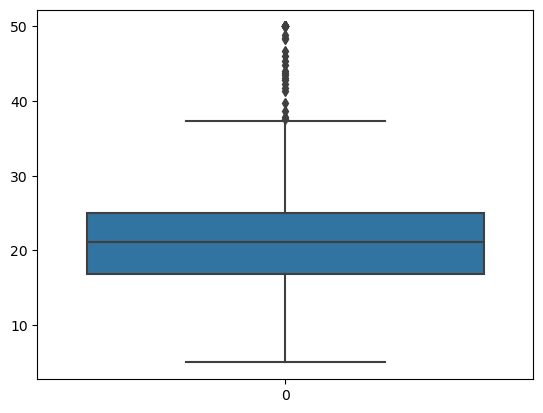

In [52]:
sns.boxplot(df["MEDV"])

In [298]:
# sns.pairplot(df, hue="species")

In [ ]:
# !pip install ydata-profiling

In [ ]:
# !pip install pandas-profiling

In [299]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [300]:
# Exploratory Data Analysis
# COrrelation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [26]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [49]:
# df

In [ ]:
df.shape

(497, 14)

In [73]:
import seaborn as sns
# sns.pairplot(df)

Text(0, 0.5, 'Price')

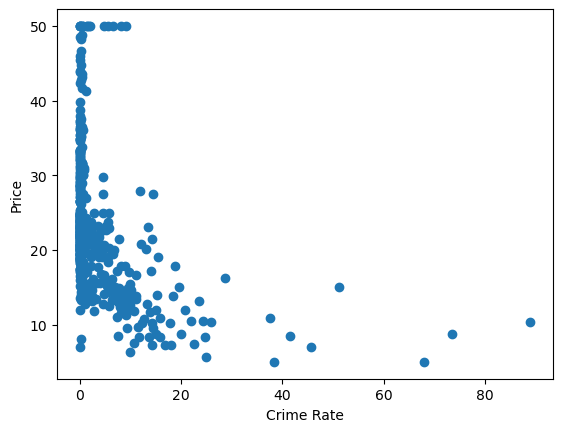

In [301]:
plt.scatter(df["CRIM"],df["MEDV"])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

In [302]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
429,9.33889,0.0,18.1,0,0.679,6.380,95.6,1.9682,24,666.0,20.2,60.72,24.08,9.5
224,0.31533,0.0,6.2,0,0.504,8.266,78.3,2.8944,8,307.0,17.4,385.05,4.14,44.8
402,9.59571,0.0,18.1,0,0.693,6.404,100.0,1.6390,24,666.0,20.2,376.11,20.31,12.1


In [303]:
df["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

Text(0, 0.5, 'Price')

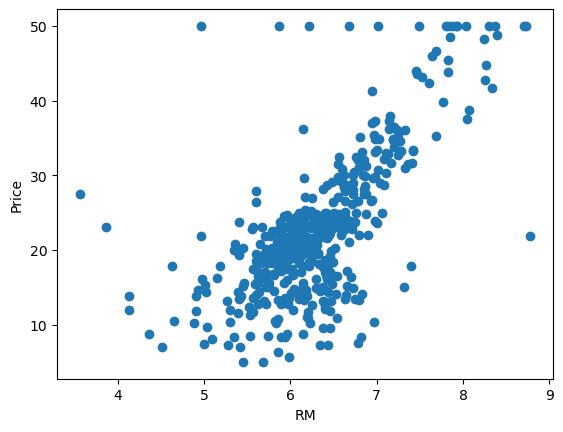

In [304]:
plt.scatter(df["RM"],df["MEDV"])
plt.xlabel("RM")
plt.ylabel("Price") # both inc

<Axes: xlabel='RM', ylabel='MEDV'>

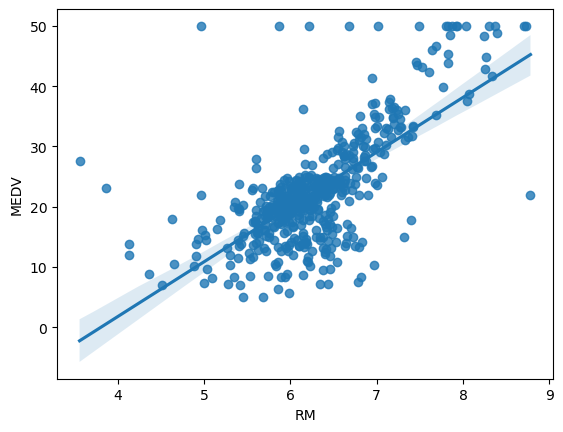

In [305]:
import seaborn as sns
sns.regplot(x="RM",y="MEDV",data=df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

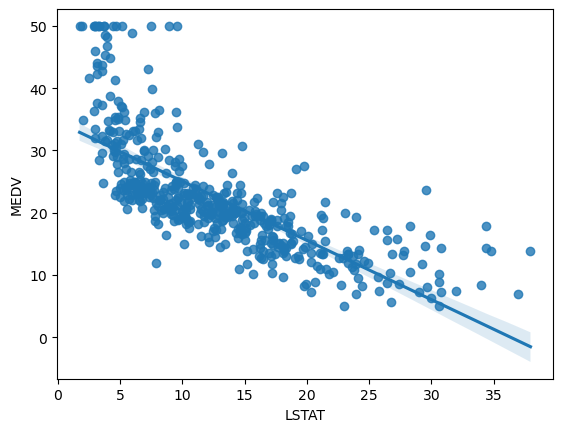

In [306]:
sns.regplot(x="LSTAT",y="MEDV",data=df)

In [71]:
# sns.regplot(x="CHAS",y="MEDV",data=df)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

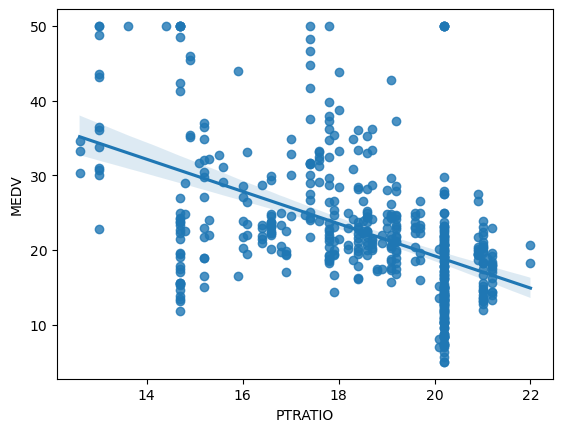

In [307]:
sns.regplot(x="PTRATIO",y="MEDV",data=df) # PTRATIO inc price is decreses

In [308]:
df.shape

(506, 14)

In [76]:
# Independent and Dependent feature
# Price is dependent feature all remaining are independent feature

# x=dataset.iloc[:,:,-1]
# y=dataset.iloc[:,-1]

In [309]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
65,0.03584,80.0,3.37,0,0.398,6.290,17.8,6.6115,4,337.0,16.1,396.90,4.67,23.5
295,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289.0,16.0,396.90,6.27,28.6
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666.0,20.2,43.06,23.98,11.8


In [310]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [311]:
x_train.shape

(404, 13)

In [312]:
x_test.shape

(102, 13)

In [313]:
y_train.shape

(404,)

In [314]:
y_test.shape

(102,)

c:\Users\Solution\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


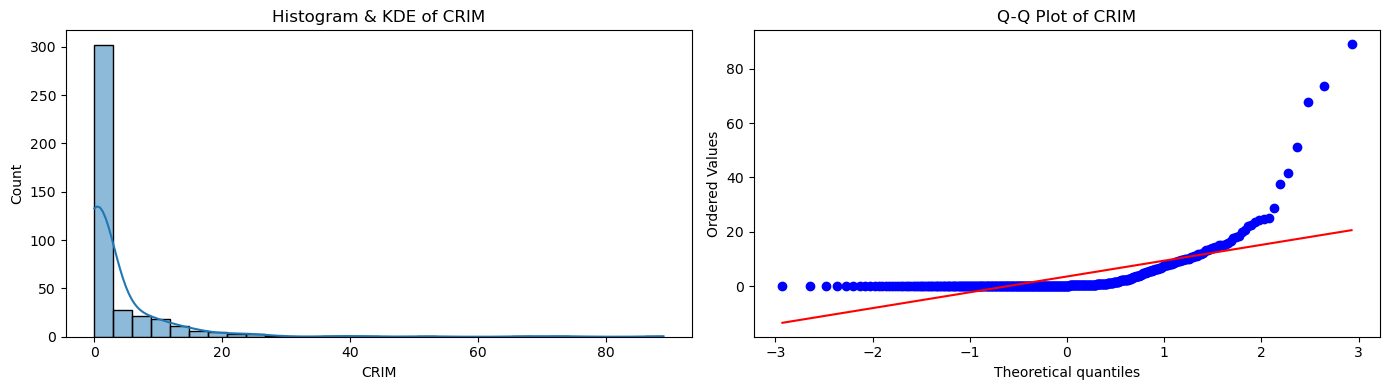

c:\Users\Solution\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


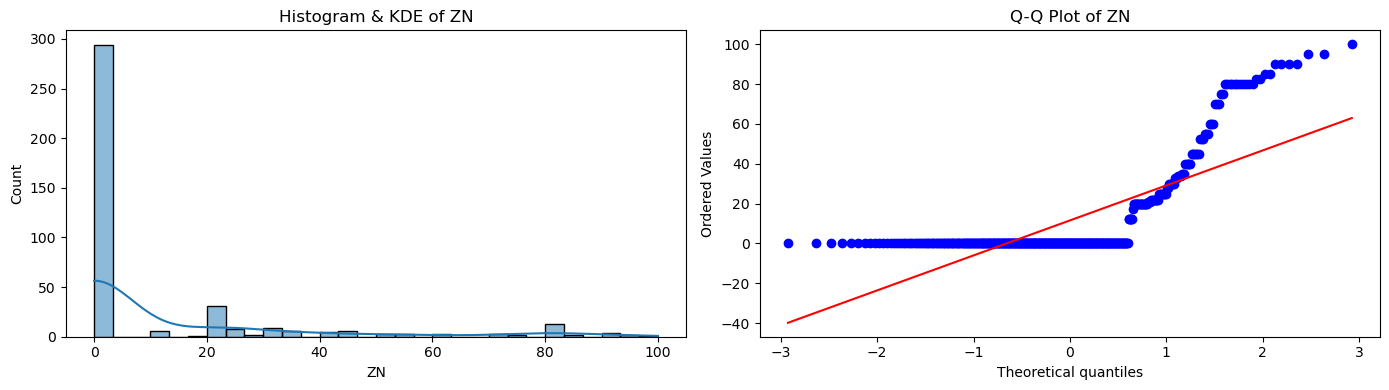

c:\Users\Solution\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


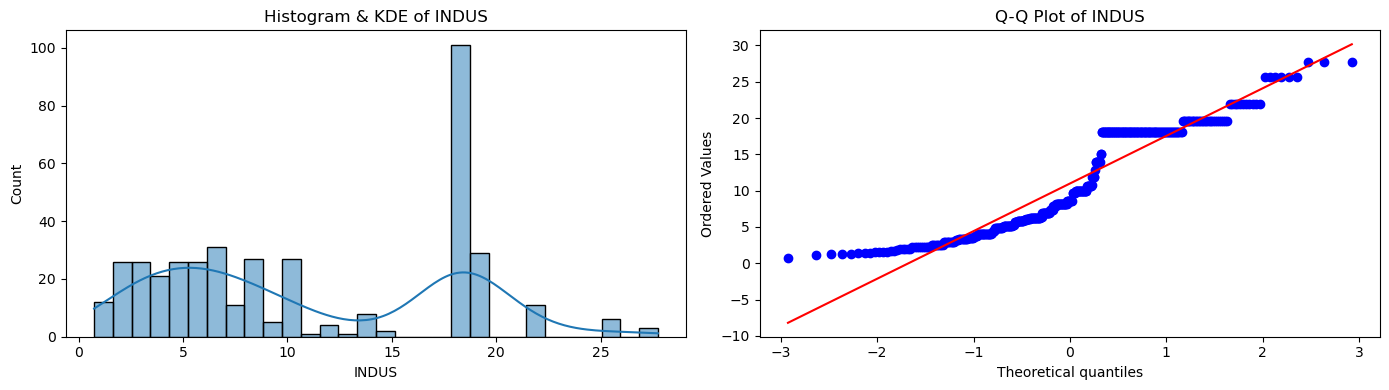

c:\Users\Solution\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

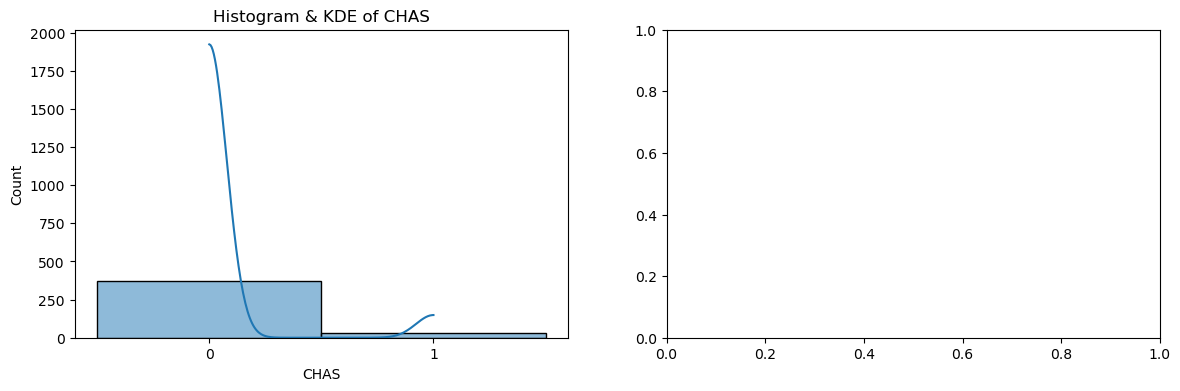

In [315]:
# Plotting the distplots without any transformation
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# loop through all features except target
for col in df.columns[:-1]:   # exclude target column
    plt.figure(figsize=(14,4))
    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(x_train[col], kde=True, bins=30)   
    plt.title(f"Histogram & KDE of {col}")
    
    # Q-Q Plot
    plt.subplot(1,2,2)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")
    
    plt.tight_layout()
    plt.show()

In [88]:
# Standarized the dataset

In [33]:
# %pip install ydata-profiling

In [89]:
import pandas as pd

# Show summary statistics (min, max, mean, std)
print(df.describe().T[["min", "max", "mean", "std"]])

               min       max        mean         std
CRIM       0.00632   73.5341    3.499042    7.773071
ZN         0.00000  100.0000   10.342052   21.977392
INDUS      0.46000   27.7400   11.274306    6.809674
NOX        0.38500    0.8710    0.556810    0.115307
RM         3.56100    8.7800    6.278871    0.703116
AGE        2.90000  100.0000   69.147082   27.936062
DIS        1.12960    9.2229    3.706699    1.975310
TAX      188.00000  711.0000  408.929577  169.194632
PTRATIO   13.00000   21.2000   18.476660    2.122037
B          0.32000  396.9000  356.197867   92.032748
LSTAT      1.73000   37.9700   12.745533    7.154446
MEDV       5.00000   50.0000   22.497787    9.218332


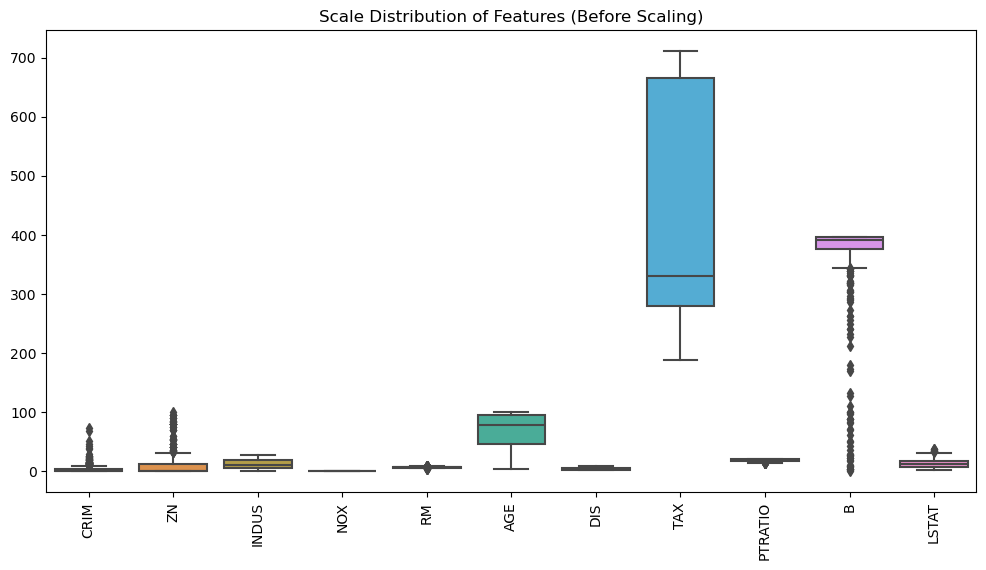

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop("MEDV", axis=1))  # drop target
plt.xticks(rotation=90)
plt.title("Scale Distribution of Features (Before Scaling)")
plt.show()

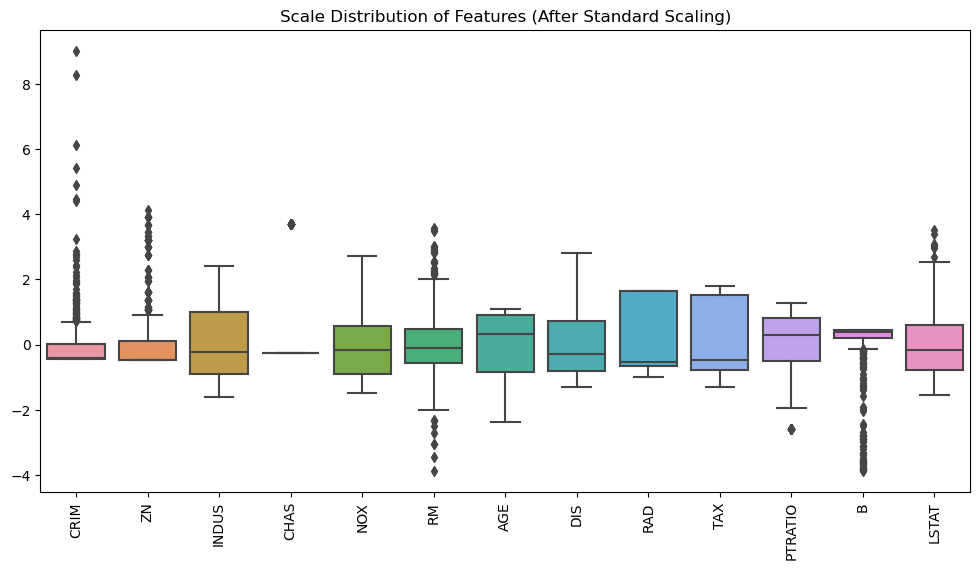

In [118]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard scaling (mean=0, std=1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop("MEDV", axis=1)),
                         columns=df.columns[:-1])

# Add back target
df_scaled["MEDV"] = df["MEDV"]

# Visualize again
plt.figure(figsize=(12,6))
sns.boxplot(data=df_scaled.drop("MEDV", axis=1))
plt.xticks(rotation=90)
plt.title("Scale Distribution of Features (After Standard Scaling)")
plt.show()

Here see not need scaling this type of data

In [90]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
437,15.1772,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666.0,20.2,9.32,26.45,8.7
189,0.0837,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398.0,15.2,396.90,5.39,34.9
320,0.1676,0.0,7.38,0,0.493,6.426,52.3,4.5404,5,287.0,19.6,396.90,7.20,23.8


In [91]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [93]:
x_train.shape

(404, 13)

In [94]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
325    24.6
335    21.1
56     24.7
437     8.7
409    27.5
334    20.7
181    36.2
227    31.6
434    11.7
180    39.8
25     13.9
493    21.8
238    23.7
244    17.6
250    24.4
418     8.8
117    19.2
42     25.3
322    20.4
347    23.1
182    37.9
155    15.6
280    45.4
126    15.7
329    22.6
31     14.5
113    18.7
148    17.8
432    16.1
338    20.6
57     31.6
194    29.1
24     15.6
17     17.5
298    22.5
66     19.4
211    19.3
404     8.5
94     20.6
154    17.0
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
360    25.0
3      33.4
405     5.0
185    29.6
60     18.7
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
478    14.6
26     16.6
7      27.1
492    20.1
108    19.8
37     21.0
157    41.3
472    23.2
118    20.4
114    18.5
175    29.4
192    36.4
272    24.4
144    11.8
373    13.8
383    12.3
356    17.8
277    33.1
220 

In [95]:
df.shape

(497, 14)

In [96]:
x_train.shape

(404, 13)

In [97]:
y_train.shape

(404,)

In [317]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [318]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [319]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_pred is  predictions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
print("Root mean square:",rmse)

Mean Squared Error (MSE): 24.291119474973478
Mean Absolute Error (MAE): 3.1890919658878416
R-squared (R²): 0.6687594935356326
Root mean square: 4.928602182665332


In [398]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [399]:
# x_train=scaler.fit_transform(x_train)

In [ ]:
# x_test=scaler.transform(x_test)

In [400]:
x_train

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [403]:
x_test

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

# Model Training

In [436]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [437]:
regression.fit(x_train,y_train)

LinearRegression()

In [438]:
# print the coeffecients and the intercept
print(regression.coef_) # this will equal to no of independent feature

[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


In [460]:
feature_order = x.columns.tolist()
pickle.dump(feature_order, open("features.pkl","wb"))

In [465]:
import pickle

# Save features list
with open("features.pkl", "wb") as f:
    pickle.dump(x.columns.tolist(), f)

In [468]:
print(regression.intercept_)

22.796534653465343


In [470]:
# After training
feature_names = x.columns.tolist()

with open("features.pkl", "wb") as f:
    pickle.dump(feature_names, f)

In [473]:
# On which parameter the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [476]:
# Prediction with Test Data
reg_pred=regression.predict(x_test)

In [477]:
reg_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [478]:
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [479]:
import pickle

# Save trained model
with open("regmodel.pkl", "wb") as f:
    pickle.dump(regression, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

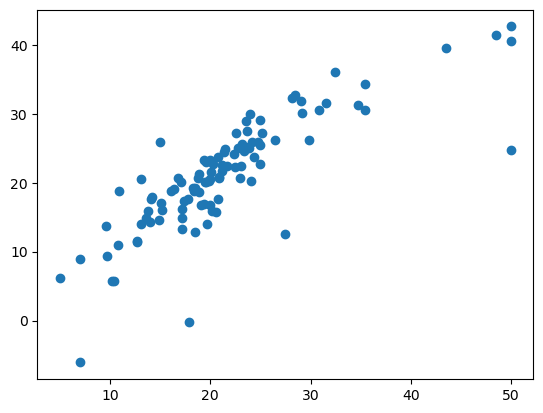

In [480]:
# plot a scatter plot fo the prediction
plt.scatter(y_test,reg_pred) # when show linear our model perform well (reg_pred is true value)

In [481]:
# Residuals means (error)
residuals=y_test-reg_pred

In [482]:
residuals

173    -5.396724
274    -3.625565
491    -1.216944
72     -2.231979
452    -2.669880
76     -3.254429
316     0.137462
140    -0.341190
471    -3.413207
500    -3.832456
218    -3.408505
9       0.261164
414    13.088422
78     -0.558347
323    -0.739226
473     3.606803
124    -1.847733
388     4.405273
195     9.499660
448    -3.512891
271    -2.049095
278    -0.966254
30      1.358207
501    -1.760776
421    -3.660585
474    -2.036098
79     -2.481481
454     0.322956
210    -0.736261
497    -0.896318
172     0.666165
320    -1.419791
375   -10.939096
362     3.098376
467     2.330883
153     2.448746
2       3.466598
336    -0.632467
208     0.634210
73     -1.232292
496     5.757950
307    -4.055763
204     7.327488
68      0.072550
90     -4.676186
390    -1.893110
33     -0.970091
70     -1.703419
470    -0.394860
0      -5.953396
11     -2.388602
281     1.055481
22     -0.847391
101     0.274376
268     3.960602
485    -1.379507
442    -0.445314
290    -4.225317
84     -1.1673

c:\Users\Solution\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


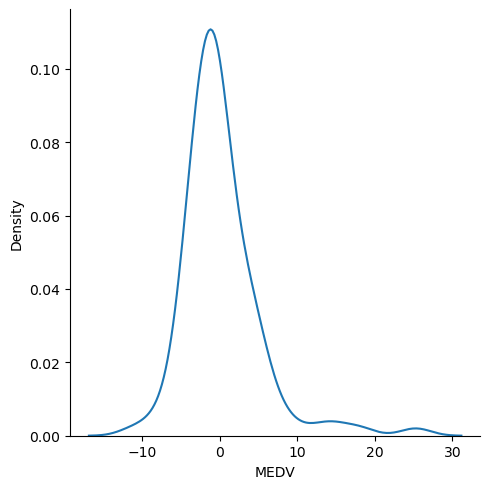

In [483]:
# plot this residuals
sns.displot(residuals,kind="kde")

# Assumptions

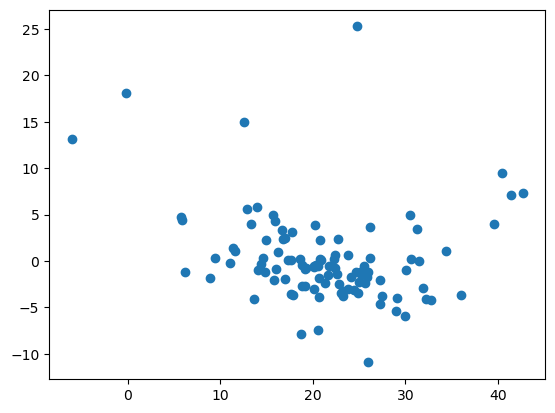

In [484]:
# scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(reg_pred,residuals) # predict on output and predicted value

In [485]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred))) # these model show how your model performing well

3.1890919658878474
24.291119474973495
4.928602182665334


# R square and adjusted R square

In [486]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score) # It is approx good

0.6687594935356322


In [487]:
# display adjusted R-squared
1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6198262368988505

# New Data Prediction

In [488]:
boston.data.shape

(506, 13)

In [489]:
boston.data.iloc[0].shape

(13,)

In [490]:
import numpy as np

In [491]:
boston.data.iloc[0].values.reshape(1, -1)

array([[0.00632, 18.0, 2.31, '0', 0.538, 6.575, 65.2, 4.09, '1', 296.0,
        15.3, 396.9, 4.98]], dtype=object)

In [492]:
boston.data.iloc[0].values.reshape(1, -1).shape

(1, 13)

In [493]:
regression.predict(boston.data.iloc[0].values.reshape(1, -1))

array([-90.14868001])

In [494]:
# transformation of new data
scaler.transform(boston.data.iloc[0].values.reshape(1, -1))

array([[ 6.32000000e-03,  1.80000000e+01,  2.31000000e+00,
        -1.31907686e-17,  5.38000000e-01,  6.57500000e+00,
         6.52000000e+01,  4.09000000e+00,  1.00000000e+00,
         2.96000000e+02,  1.53000000e+01,  3.96900000e+02,
         4.98000000e+00]])

In [495]:
regression.predict(scaler.transform(boston.data.iloc[0].values.reshape(1, -1)))

array([-90.14868001])

In [496]:
import pickle

# Save trained model
with open("regmodel.pkl", "wb") as f:
    pickle.dump(regression, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [497]:

# Test prediction (scaled input)
sample = x_test[0].reshape(1, -1)        # already scaled input
print("Prediction:", regression.predict(sample))

sample = boston.data.iloc[0].values.reshape(1, -1)   # raw row
scaled_sample = scaler.transform(sample)             # scale
print("Prediction (Boston row):", regression.predict(scaled_sample))

Prediction: [28.99672362]
Prediction (Boston row): [-90.14868001]


In [498]:
pickle_model=pickle.load(open("regmodel.pkl","rb"))

In [499]:
# Load model and scaler
pickle_model = pickle.load(open("regmodel.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

# Prediction on a new row (example: first row of Boston dataset)
# Prediction on test data (already processed features)
sample = x_test[0].reshape(1, -1)        # ek test row
scaled_sample = scaler.transform(sample) # scale karo
print("Correct Prediction:", pickle_model.predict(scaled_sample))


Correct Prediction: [28.99672362]
